<a href="https://colab.research.google.com/github/ria-heikkila/fish_species_recognizer/blob/master/fish_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [0]:
image_size = 150
num_classes = 2

In [37]:
#データの準備
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "./drive/My Drive/data_fish/train"
validate_dir = "./drive/My Drive/data_fish/validate"
batch_size = 16

#Training Set
train_set = train_datagen.flow_from_directory(train_dir,
                                             target_size=(image_size,image_size),
                                             batch_size=batch_size,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory(validate_dir,
                                           target_size=(image_size,image_size),
                                           batch_size =batch_size,
                                           class_mode='binary',
                                           shuffle=False)

Found 200 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [0]:
#モデル定義
model = Sequential()
#畳み込み処理では画像の特徴を出すためにフィルターをかける
#padding='same'とは、畳み込み結果が同じサイズにする
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(image_size, image_size, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
#プーリング処理では画像の特徴を粗く整理する
model.add(MaxPooling2D(pool_size=(2,2))) #Max Poolingは各範囲で最大値を選択して圧縮する
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [0]:
#モデルのコンパイル
model.compile(optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
#トレーニング
history = model.fit_generator(
        train_set,
        steps_per_epoch=200 // batch_size,
        epochs=10,
        validation_data=test_set,
        validation_steps=80 // batch_size)
model.save('fish_model.h5')

Epoch 1/10
12/12 [==============================] - 85s 7s/step - loss: 0.9050 - accuracy: 0.4837 - val_loss: 0.6778 - val_accuracy: 0.7500
Epoch 2/10
12/12 [==============================] - 7s 556ms/step - loss: 0.7190 - accuracy: 0.6250 - val_loss: 0.6623 - val_accuracy: 0.7750
Epoch 3/10
12/12 [==============================] - 7s 550ms/step - loss: 0.7465 - accuracy: 0.5978 - val_loss: 0.6580 - val_accuracy: 0.7875
Epoch 4/10
12/12 [==============================] - 6s 528ms/step - loss: 0.7884 - accuracy: 0.5815 - val_loss: 0.6600 - val_accuracy: 0.7875
Epoch 5/10
12/12 [==============================] - 6s 525ms/step - loss: 0.7102 - accuracy: 0.5815 - val_loss: 0.6602 - val_accuracy: 0.7625
Epoch 6/10
12/12 [==============================] - 6s 523ms/step - loss: 0.7241 - accuracy: 0.6141 - val_loss: 0.6741 - val_accuracy: 0.6250
Epoch 7/10
12/12 [==============================] - 6s 536ms/step - loss: 0.7149 - accuracy: 0.6141 - val_loss: 0.6581 - val_accuracy: 0.7625
Epoch 8/

In [41]:
test_loss, test_acc = model.evaluate_generator(test_set, steps=80)
print('test loss:', test_loss)
print('test acc:', test_acc)

Instructions for updating:
Please use Model.evaluate, which supports generators.
test loss: 0.6509892344474792
test acc: 0.7250000238418579


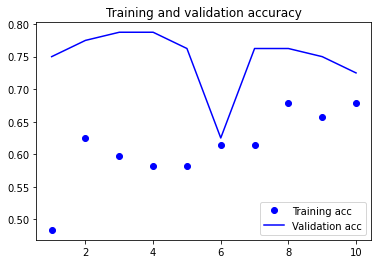

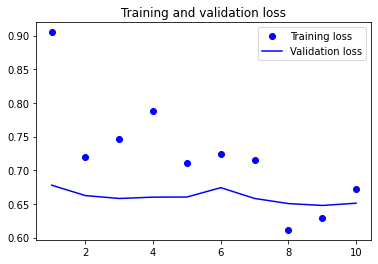

In [45]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

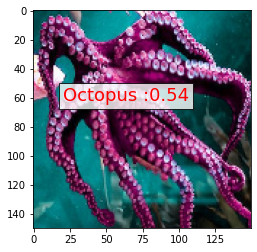

In [64]:
#画像多数の予測
%matplotlib inline
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
img1 = image.load_img('7.jpg', target_size=(image_size, image_size))
img = image.img_to_array(img1)
img = img/255.0
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Squid :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='blue',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Octopus :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()